Oswaldo ordaz 9/11/23
728654

# Actividad - Ecuaciones diferenciales

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [8]:
solve_ivp?

In [11]:
def f(t, x):
    return x/(t + 1)

tspan = [0, 20]
x0 = np.array([0.5])

x = solve_ivp(f,tspan, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 5.000e-01  5.500e-01  1.050e+00  6.052e+00  1.050e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

Grafique con condición inicial $x_0 = 2$

In [12]:
tspan = [0, 20]
x0 = np.array([2])

x = solve_ivp(f,tspan, x0)
x

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01  1.100e+00  1.110e+01  2.000e+01]
        y: [[ 2.000e+00  2.200e+00  4.200e+00  2.420e+01  4.200e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0

In [14]:
x.y

array([[ 2.        ,  2.20002   ,  4.20021996, 24.20221956, 42.        ]])

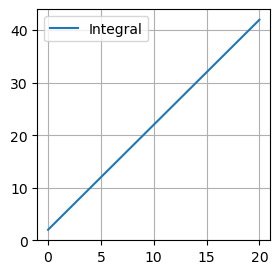

In [18]:
%matplotlib inline
plt.figure(figsize=(3, 3))
plt.plot(x.t, x.y[0, :], label="Integral")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [69]:
w0 = 3

def fulanito(t, X) :
    # t es un escalar
    # X es un arreglo que contiene x y dx
    x = X[0]
    dx = X[1]
    d2x = -w0**2*x
    
    return [dx, d2x]

tspan = [0, 10]
x0 = np.array([.5, .1])

In [70]:
g = solve_ivp(fulanito, tspan, x0)

Grafique

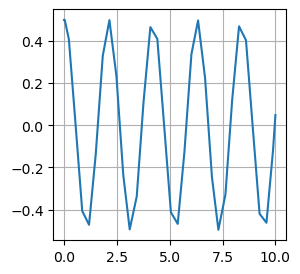

In [71]:
%matplotlib inline
plt.figure(figsize=(3, 3))
plt.plot(g.t, g.y[0, :])
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def posicion(t, w0, th0, v0):
    A = th0
    B = v0/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t, w0, th0, v0):
    A = th0
    B = v0/w0
    return w0*(-A*np.sin(w0*t)) + B*np.cos(w0*t)

In [73]:
tspan

[0, 10]

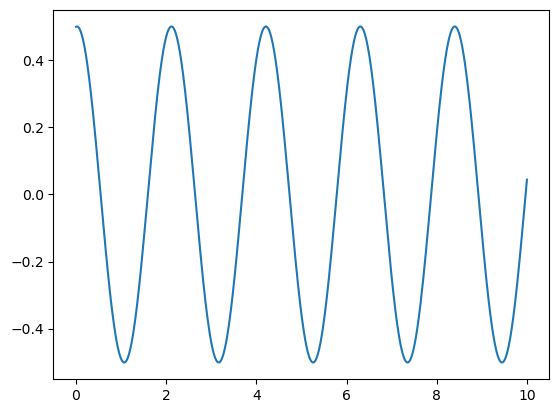

In [74]:
t = np.linspace(tspan[0], tspan[1], 1000)

plt.figure()
plt.plot(t, posicion(t, w0, 0.5, 0.1))

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

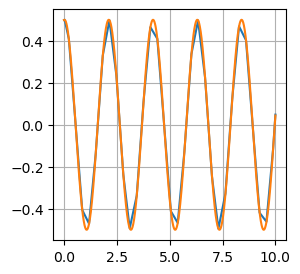

In [75]:
%matplotlib inline
plt.figure(figsize=(3, 3))
plt.plot(g.t, g.y[0, :])
plt.plot(t, posicion(t, w0, 0.5, 0.1))
plt.grid()